# Calculating the average number of bound linkers for FtsZ filament

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r_mono = 4.2   # lenght of monomer in nm
R_cell = 350.0   # Cell radius in nm

In [3]:
def Average_n(N, lp, Ebind0, R0):
    nn = np.arange(1, N+1)
    n = nn[np.newaxis,np.newaxis,:]
    dEbend = r_mono * (n - 1) *  lp * ( (1/R_cell) - (1/R0)  )**2
    dEbind = n * Ebind0
    w_n = (N - n + 1) * np.exp(-(dEbend + dEbind))
    zz = np.sum(w_n,axis=2)
    Z = np.repeat(zz[:, :, np.newaxis], N, axis=2)
    p_n = w_n / Z
    avg_n = np.sum(n * p_n,axis=2)
    return avg_n

In [22]:
def Average_n_Nseries(N, lp, Ebind0, R0):
    avg_n = []
    for i, n in enumerate(N):
        avg_n[i,:]=Average_n(n, lp, Ebind0, R0)
    return avg_n

# $E_b$ vs $l_p%$ for for fixed filament length

In [5]:
xx = np.linspace(0,3000.0,num=81)
lpSeries = xx[np.newaxis,:,np.newaxis]
yy = -np.linspace(0,1,num=21)
EbSeries = yy[:,np.newaxis,np.newaxis]
N = 20  # number of monomers
R0 = 150  #intrinsic radius of curvature
Matrix = Average_n(N,lpSeries,EbSeries,R0)

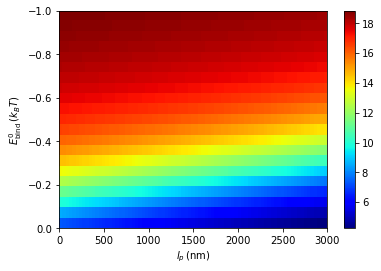

In [6]:
plt.imshow(Matrix, extent=[xx[0], xx[-1], yy[0], yy[-1]], aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

plt.ylabel(r'$E_{\rm bind}^0\,(k_BT)$')
plt.xlabel(r'$l_p\,(\mathrm{nm})$')

#plt.title(r'$N = {}$, $R_0 = {}\,\mathrm{{nm}}$'.format(N[0], R0[0]))

plt.show()

# $R_0$ vs $l_p%$ for for fixed filament length

In [7]:
xx = np.linspace(0,20000.0,num=81)
lpSeries = xx[np.newaxis,:,np.newaxis]
yy = np.linspace(50,1500, num=41)
R0Series = yy[:,np.newaxis,np.newaxis]
N = 20  # number of monomers
Eb = -0.5 # the binding energy
Matrix = Average_n(N,lpSeries,Eb,R0Series)

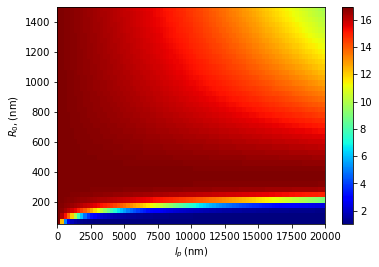

In [8]:
plt.imshow(Matrix, extent=[xx[0], xx[-1], yy[0], yy[-1]], aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

plt.ylabel(r'$R_0,(\mathrm{nm})$')
plt.xlabel(r'$l_p\,(\mathrm{nm})$')

#plt.title(r'$N = {}$, $R_0 = {}\,\mathrm{{nm}}$'.format(N[0], R0[0]))

plt.show()

lp =  10000.0 nm


<function matplotlib.pyplot.show(close=None, block=None)>

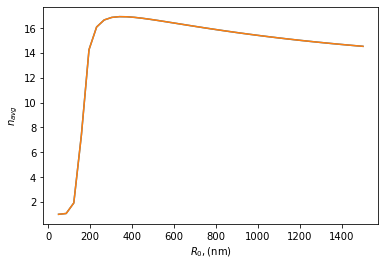

In [9]:
nlp = 40
print('lp = ',lpSeries[0,nlp,0],'nm')
R0Slice = Average_n(N,lpSeries[0,nlp,0],Eb,R0Series)
plt.plot(R0Series[:,0,0],R0Slice)
plt.plot(R0Series[:,0,0], Matrix[:,nlp])
plt.xlabel(r'$R_0,(\mathrm{nm})$')
plt.ylabel(r'$n_{avg}$')
plt.show

The plot is rather asymmetric relative to $R_{cell}$. Binding to less curved surface effectively as likely as to the optimally curved surface

In [31]:
Nmax = 20
NSeries = np.arange(1,Nmax)
#NSeries = xx[np.newaxis,:,np.newaxis]
yy = np.linspace(100,1500, num=41)
lpSeries = yy[:,np.newaxis,np.newaxis]
Eb = -0.5 # the binding energy
R0 = 100
Matrix = Average_n_Nseries(NSeries,lpSeries,Eb,R0)

TypeError: list indices must be integers or slices, not tuple

In [29]:
Nmax = 20
xx = range(1,Nmax)

In [30]:
xx

range(1, 20)